<a href="https://colab.research.google.com/github/sarthakpant772/MLnow_2.0/blob/main/employee_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem statement:
Predicting the risk of an
employee leaving the firm.

##Made by - Sarthak pant

contact me:-

[E-mail]('mailto:sarthak.pant31@gmail.com')<br>
[GitHub]('https://github.com/sarthakpant772')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/mashine_learning_models/dsc


/content/drive/MyDrive/mashine_learning_models/dsc


In [ ]:
ls

' employee_risk.ipynb'  'Test Data.csv'  'Training Data.csv'


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [4]:
risk_data=pd.read_csv('Training Data.csv')

In [5]:
risk_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


##Dealing with catagorical data

In [6]:
risk_data.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [7]:
print(f'married:{risk_data.married.unique()}')
print(f'house_ownership:{risk_data.house_ownership.unique()}')
print(f'car_ownership:{risk_data.car_ownership.unique()}')
print(f'profession:{len(risk_data.profession.unique())}')
print(f'city:{len(risk_data.city.unique())}')
print(f'state:{len(risk_data.state.unique())}')
print(f'current_job_years:{risk_data.current_job_years.unique()}')
print(f'current_house_years:{risk_data.current_house_years.unique()}')

married:['single' 'married']
house_ownership:['rented' 'norent_noown' 'owned']
car_ownership:['no' 'yes']
profession:51
city:317
state:29
current_job_years:[ 3  9  4  2  0  8 11  5  7  6 12  1 10 13 14]
current_house_years:[13 10 12 14 11]


In [8]:
from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import OneHotEncoder
x=risk_data.copy()
cardinality=[cname for cname in x if x[cname].dtype=='object']
print(cardinality)
# print(y)

['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']


In [9]:
lable_x=x.copy()

ordinal_encoder= OrdinalEncoder()
lable_x[cardinality]=ordinal_encoder.fit_transform(x[cardinality])
lable_x.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,1.0,2.0,0.0,33.0,251.0,13.0,3,13,0
1,2,7574516,40,10,1.0,2.0,0.0,43.0,227.0,14.0,9,13,0
2,3,3991815,66,4,0.0,2.0,0.0,47.0,8.0,12.0,4,10,0
3,4,6256451,41,2,1.0,2.0,1.0,43.0,54.0,17.0,2,12,1
4,5,5768871,47,11,1.0,2.0,0.0,11.0,296.0,22.0,3,14,1


#EDA

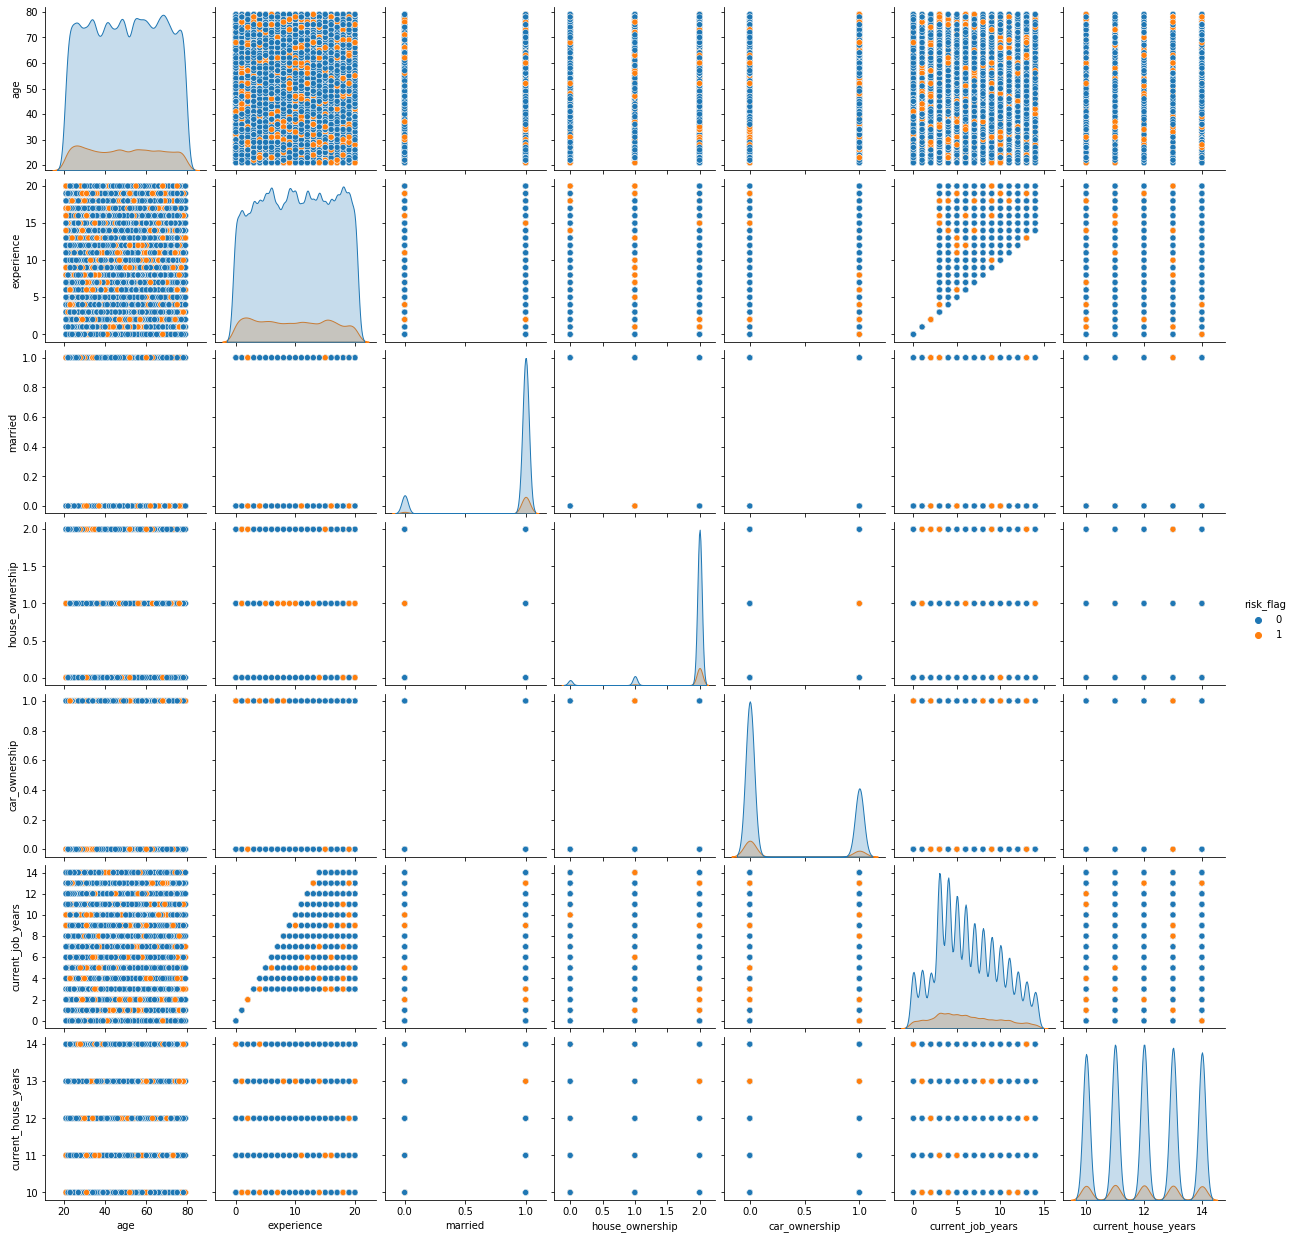

In [ ]:
sns.pairplot(lable_x,
             x_vars=[ 'age', 'experience', 'married', 'house_ownership','car_ownership', 'current_job_years','current_house_years'],
             y_vars=[ 'age', 'experience', 'married', 'house_ownership','car_ownership', 'current_job_years','current_house_years'],
             hue='risk_flag',
             diag_kind='kde')

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


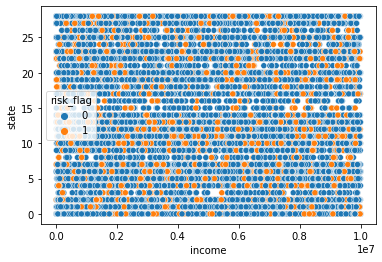

In [ ]:
sns.scatterplot(x=lable_x['income'],y=lable_x['state'],hue=lable_x['risk_flag'])

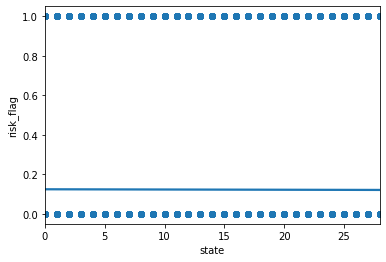

In [ ]:
sns.regplot(x=lable_x['state'],y=lable_x['risk_flag'])

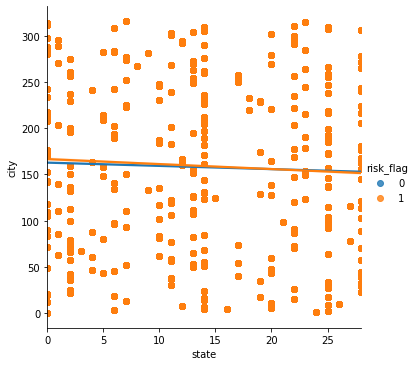

In [ ]:
sns.lmplot(x='state',y='city',data=lable_x,hue='risk_flag')


In [ ]:
sns.lmplot(x='state',y='city',data=lable_x,hue='risk_flag')


##Conclusion

* We can say that we can choose state and remove city as we can have ```Data Leakage``` issue after the model is created as there are so many city that we havent concidered during model training

* We need to normaize our income,age as it varry a lot and can slow model speed significantly.

#Data cleaning


In [10]:
lable_x.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [13]:
lable_x_final=lable_x[['income','age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'state', 'current_job_years',
       'current_house_years', 'risk_flag']]

lable_x_final.head()

,income,age,experience,married,house_ownership,car_ownership,profession,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,1.0,2.0,0.0,33.0,13.0,3,13,0
1,7574516,40,10,1.0,2.0,0.0,43.0,14.0,9,13,0
2,3991815,66,4,0.0,2.0,0.0,47.0,12.0,4,10,0
3,6256451,41,2,1.0,2.0,1.0,43.0,17.0,2,12,1
4,5768871,47,11,1.0,2.0,0.0,11.0,22.0,3,14,1


In [23]:
y=lable_x_final['risk_flag']
X=lable_x_final[['income','age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'state', 'current_job_years',
       'current_house_years']]

In [24]:
y.head()
# X.head()

0    0
1    0
2    0
3    1
4    1
Name: risk_flag, dtype: int64

In [26]:
X.head()

,income,age,experience,married,house_ownership,car_ownership,profession,state,current_job_years,current_house_years
0,1303835,23,3,1.0,2.0,0.0,33.0,13.0,3,13
1,7574516,40,10,1.0,2.0,0.0,43.0,14.0,9,13
2,3991815,66,4,0.0,2.0,0.0,47.0,12.0,4,10
3,6256451,41,2,1.0,2.0,1.0,43.0,17.0,2,12
4,5768871,47,11,1.0,2.0,0.0,11.0,22.0,3,14


In [16]:
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

my_Pipeline=Pipeline(steps=[
                            ('model',LogisticRegression(random_state=0, solver='liblinear'))
])

In [27]:
from sklearn.model_selection import cross_val_score
scores=-1 * cross_val_score(my_Pipeline,X,y,
                           scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [0.12299603 0.12299603 0.12299603 0.12299603 0.12301587]


In [ ]:
pred=my_Pipeline.predict()